<a href="https://colab.research.google.com/github/JSJeong-me/RNX/blob/main/frame-sampling-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp /content/drive/MyDrive/P1000062.MP4 .

In [1]:
import cv2

# 동영상 파일 경로
video_path = 'P1000062.MP4'

# 동영상 읽기
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open the video file.")
    exit()

# 동영상의 FPS (프레임 수)를 얻습니다.
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"The video has {fps:.2f} frames per second.")

cap.release()


The video has 59.94 frames per second.


In [ ]:
import cv2
import os
import time

# 동영상 파일 경로
video_path = 'P1000062.MP4'
# 저장할 이미지의 디렉토리
output_dir = 'frames_output'

# 디렉토리가 없으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 동영상 읽기
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open the video file.")
    exit()

# 동영상의 FPS (프레임 수)를 얻습니다.
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 프레임 카운터
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 초당 30 프레임을 저장하려면 모든 프레임을 저장하는 것이 아니라
    # 동영상의 FPS를 기준으로 일정 간격으로 프레임을 저장해야 합니다.
    if frame_count % (fps // 30) == 0:
        # 현재 시간을 기반으로 파일 이름 생성
        timestamp = time.strftime("%Y%m%d_%H%M%S")
        frame_filename = os.path.join(output_dir, f"{timestamp}.png")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved {frame_filename}")

    frame_count += 1
    # 1초 대기 (초당 30 프레임을 위해)
    time.sleep(1/30)

cap.release()
print("Done!")


Image width: 1920, height: 1080


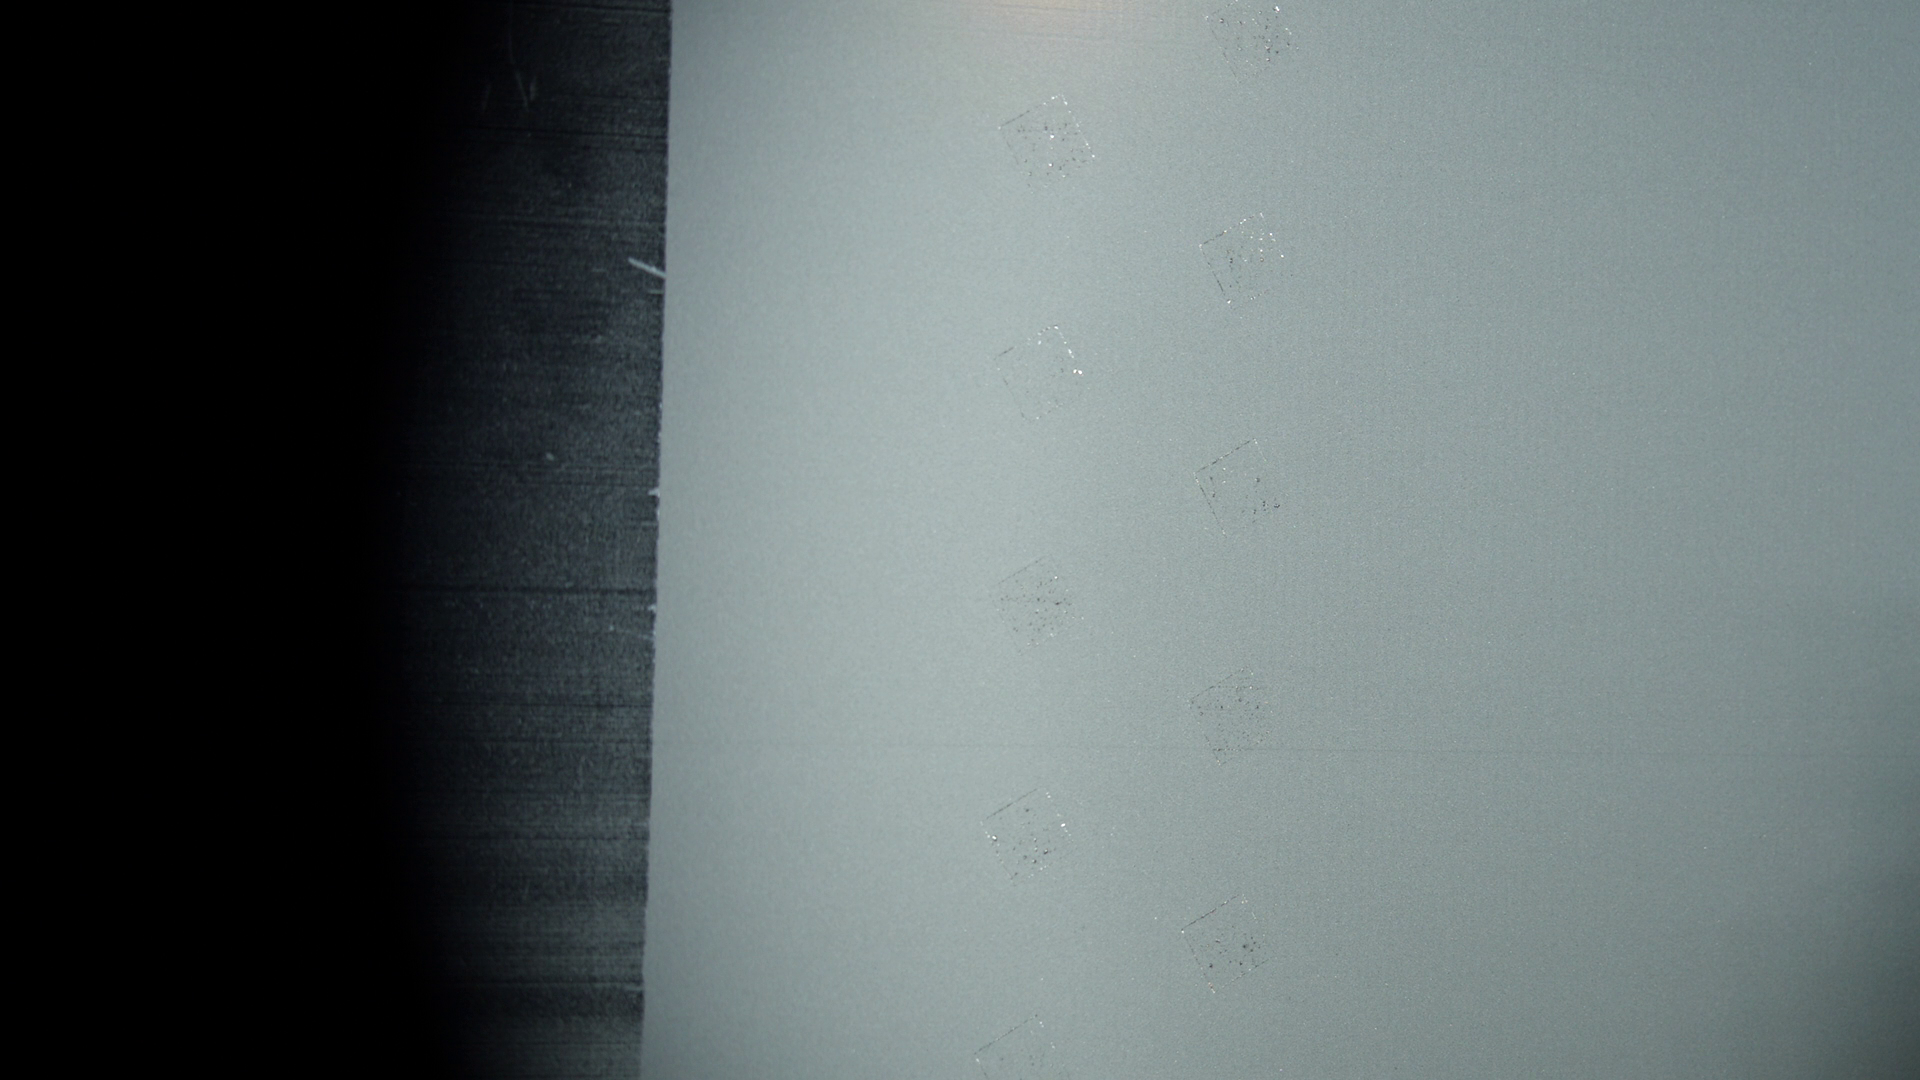

In [5]:
# Google Colab에서 필요한 라이브러리를 설치합니다.
# !pip install opencv-python

# 필요한 모듈을 임포트합니다.
import cv2
from google.colab.patches import cv2_imshow

# 이미지 파일을 읽습니다.
image = cv2.imread('frames_output/20230812_091738.png')

# 이미지 파일이 제대로 읽혔는지 확인합니다.
if image is None:
    print("Error: Couldn't read the image file.")
    exit()

# 이미지의 너비와 높이를 확인합니다.
height, width, _ = image.shape
print(f"Image width: {width}, height: {height}")

# cv2_imshow를 사용하여 이미지를 표시합니다.
cv2_imshow(image)
